<a href="https://colab.research.google.com/github/HuynhTanNam-19146217/CIFAR100-ANN/blob/CODE/Cifar100ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers.core.flatten import Flatten
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import scale
from keras.layers import Activation#Dense la tao ra, ket noi phan tu
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
from keras.callbacks import EarlyStopping

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

In [ ]:
(x_train,y_train),(x_test,y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:

x_pre = x_test[0]
y_pre = y_test[0]

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)
x_train.shape

(50000, 3072)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               786688    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 100)              

In [ ]:
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 100, validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 9s 28ms/step - loss: 0.0099 - acc: 0.0278 - val_loss: 0.0098 - val_acc: 0.0428
Epoch 2/100
313/313 [==============================] - 9s 28ms/step - loss: 0.0098 - acc: 0.0413 - val_loss: 0.0098 - val_acc: 0.0526
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.0098 - acc: 0.0512 - val_loss: 0.0097 - val_acc: 0.0656
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.0097 - acc: 0.0573 - val_loss: 0.0097 - val_acc: 0.0736
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.0097 - acc: 0.0645 - val_loss: 0.0097 - val_acc: 0.0860
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.0097 - acc: 0.0674 - val_loss: 0.0096 - val_acc: 0.0840
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.0097 - acc: 0.0740 - val_loss: 0.0096 - val_acc: 0.1030
Epoch 8/100
313/313 [==============================] - 7s 23ms

In [ ]:
model.save('cifar100.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('cifar100.h5')

In [ ]:
model.evaluate (x_train, y_train)
score=model.evaluate(x_test,y_test,verbose=1)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra la:',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0093 - acc: 0.1645
sai so kiem tra la: 0.00925880391150713
do chinh xac kiem tra la: 0.16449999809265137


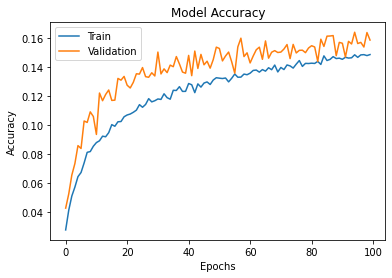

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper left')

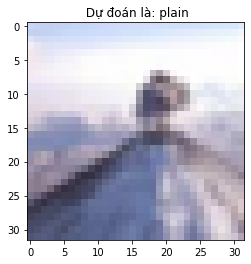

In [ ]:
cifar_100_Label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
test = 140
plt.title(" Dự đoán là: " 
          + str(cifar_100_Label[np.argmax(model.predict(x_pre.reshape((-1,3072))))]))
plt.imshow(x_pre, cmap=plt.get_cmap('gray'))